# Ames House Price EDA
Load the data, inspect, and do exploratory data analysis. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

## Data Overview
Load, data overview, variable types, summary statistics, NA checking.

In [2]:
df = pd.read_csv('../data/train.csv')
df.drop(columns=['Id'], inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Lots of columns
df.info()
display(df.describe(exclude='number'), 
        df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
BldgType         0.000000
dtype: float64


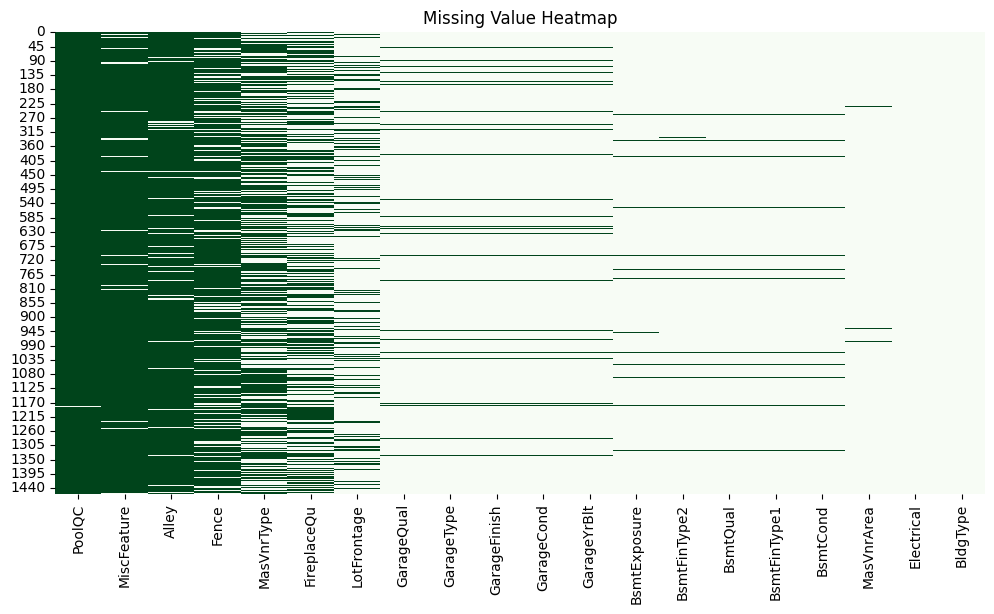

In [4]:
# Missing value heatmap

df_mis = df.isnull().sum().sort_values(ascending=False).head(20)/df.shape[0]*100
print(df_mis)

plt.figure(figsize=(12, 6))
sns.heatmap(df[df_mis.index].isnull(), cbar=False, cmap='Greens')
plt.title("Missing Value Heatmap")
plt.savefig('../outputs/eda_missing.png', bbox_inches='tight')
plt.show()

**Insight**
- For modeling, we will definitely drop any variable that has a lot of missing values, more than 80%, which are PoolQC, MiscFeature, Alley, and Fence
- For the other, we will do imputation, probably using unique value (-1) or median, depends on the data types

## Viz
Exploratory data analysis, including: 
1. Target variable
2. Categorical variable vs target
3. Numerical variable vs target
4. Mutual Information with the target


In [5]:
# Split categorical and numerical columns
# Define number: all number, including low nunique()
num_cols = df.drop('SalePrice', axis=1).select_dtypes('number').columns
num_cols = list(num_cols)

# Define categorical: non number or nunique() < 25
cat_cols = df.select_dtypes('object').columns
cat_cols = list(cat_cols) + [k for k in num_cols if df[k].nunique()<25]

# There are just lots of them. 
len(num_cols), len(cat_cols)

(36, 61)

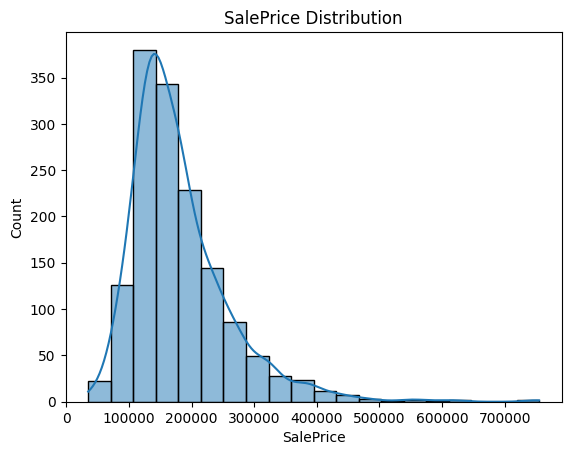

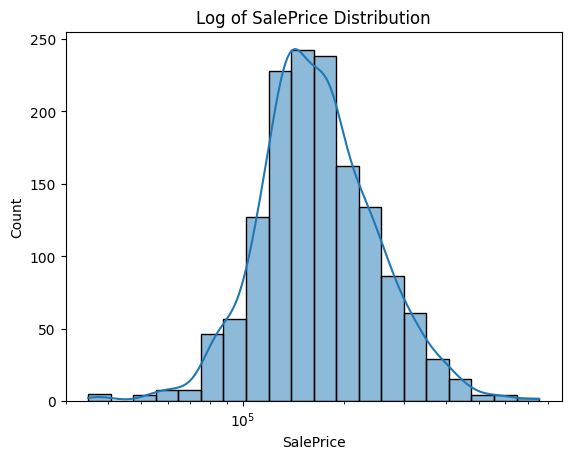

In [6]:
# Target variable distribution
target = 'SalePrice'

sns.histplot(df[target], kde=True, bins=20)
plt.title(f'{target} Distribution')
plt.show()
plt.savefig('../outputs/eda_target_dist.png', bbox_inches='tight')

sns.histplot(df[target], kde=True, log_scale=True, bins=20)
plt.title(f'Log of {target} Distribution')
plt.show()

**Insight**
- As expected with economical data (money-related), the distribution of target variable (`SalePrice`) is right-skewed. 
- Many of the houses are inexpensive, but a very few of them are highly costly.  

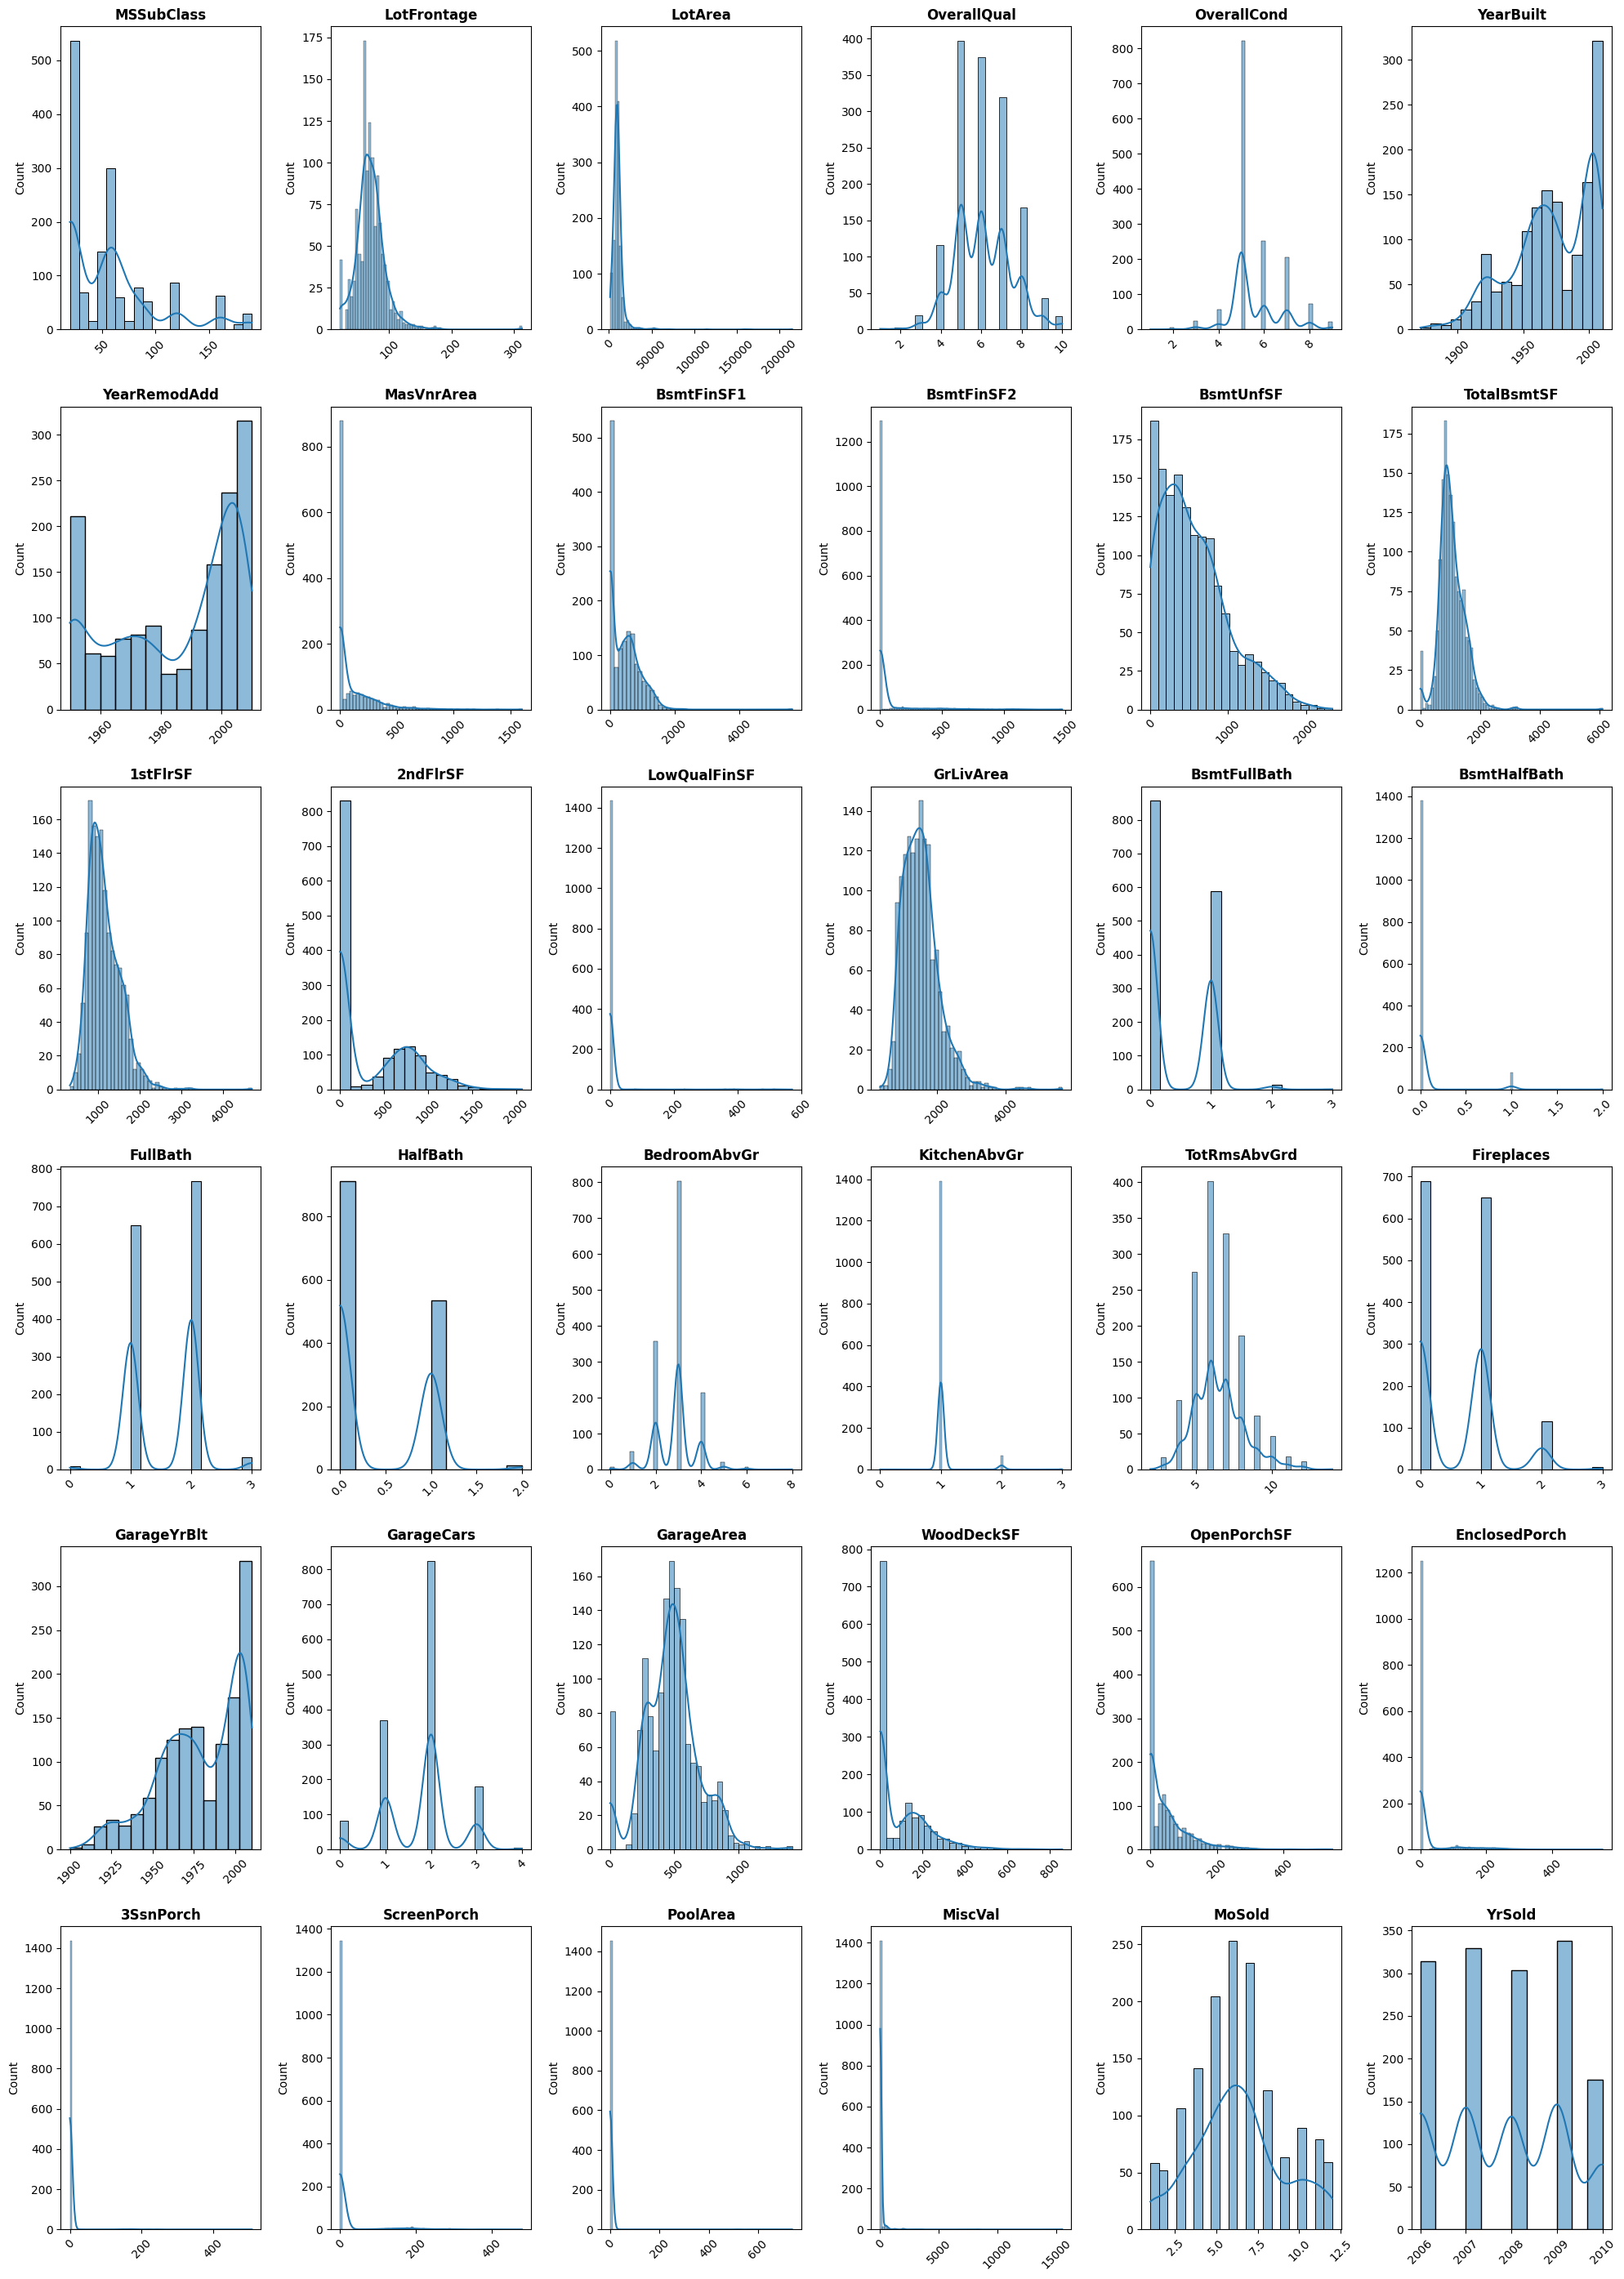

In [7]:
# Useless numerical features distribution
fig, axes = plt.subplots(6, 6, figsize=(20, 28), sharey=False)
axes = axes.ravel()

for i, var in enumerate(num_cols):
    sns.histplot(data=df[var], ax=axes[i], kde=True)
    axes[i].set_title(f'{var}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(None)
    axes[i].tick_params(axis='x', rotation=45)
    pass
plt.tight_layout()

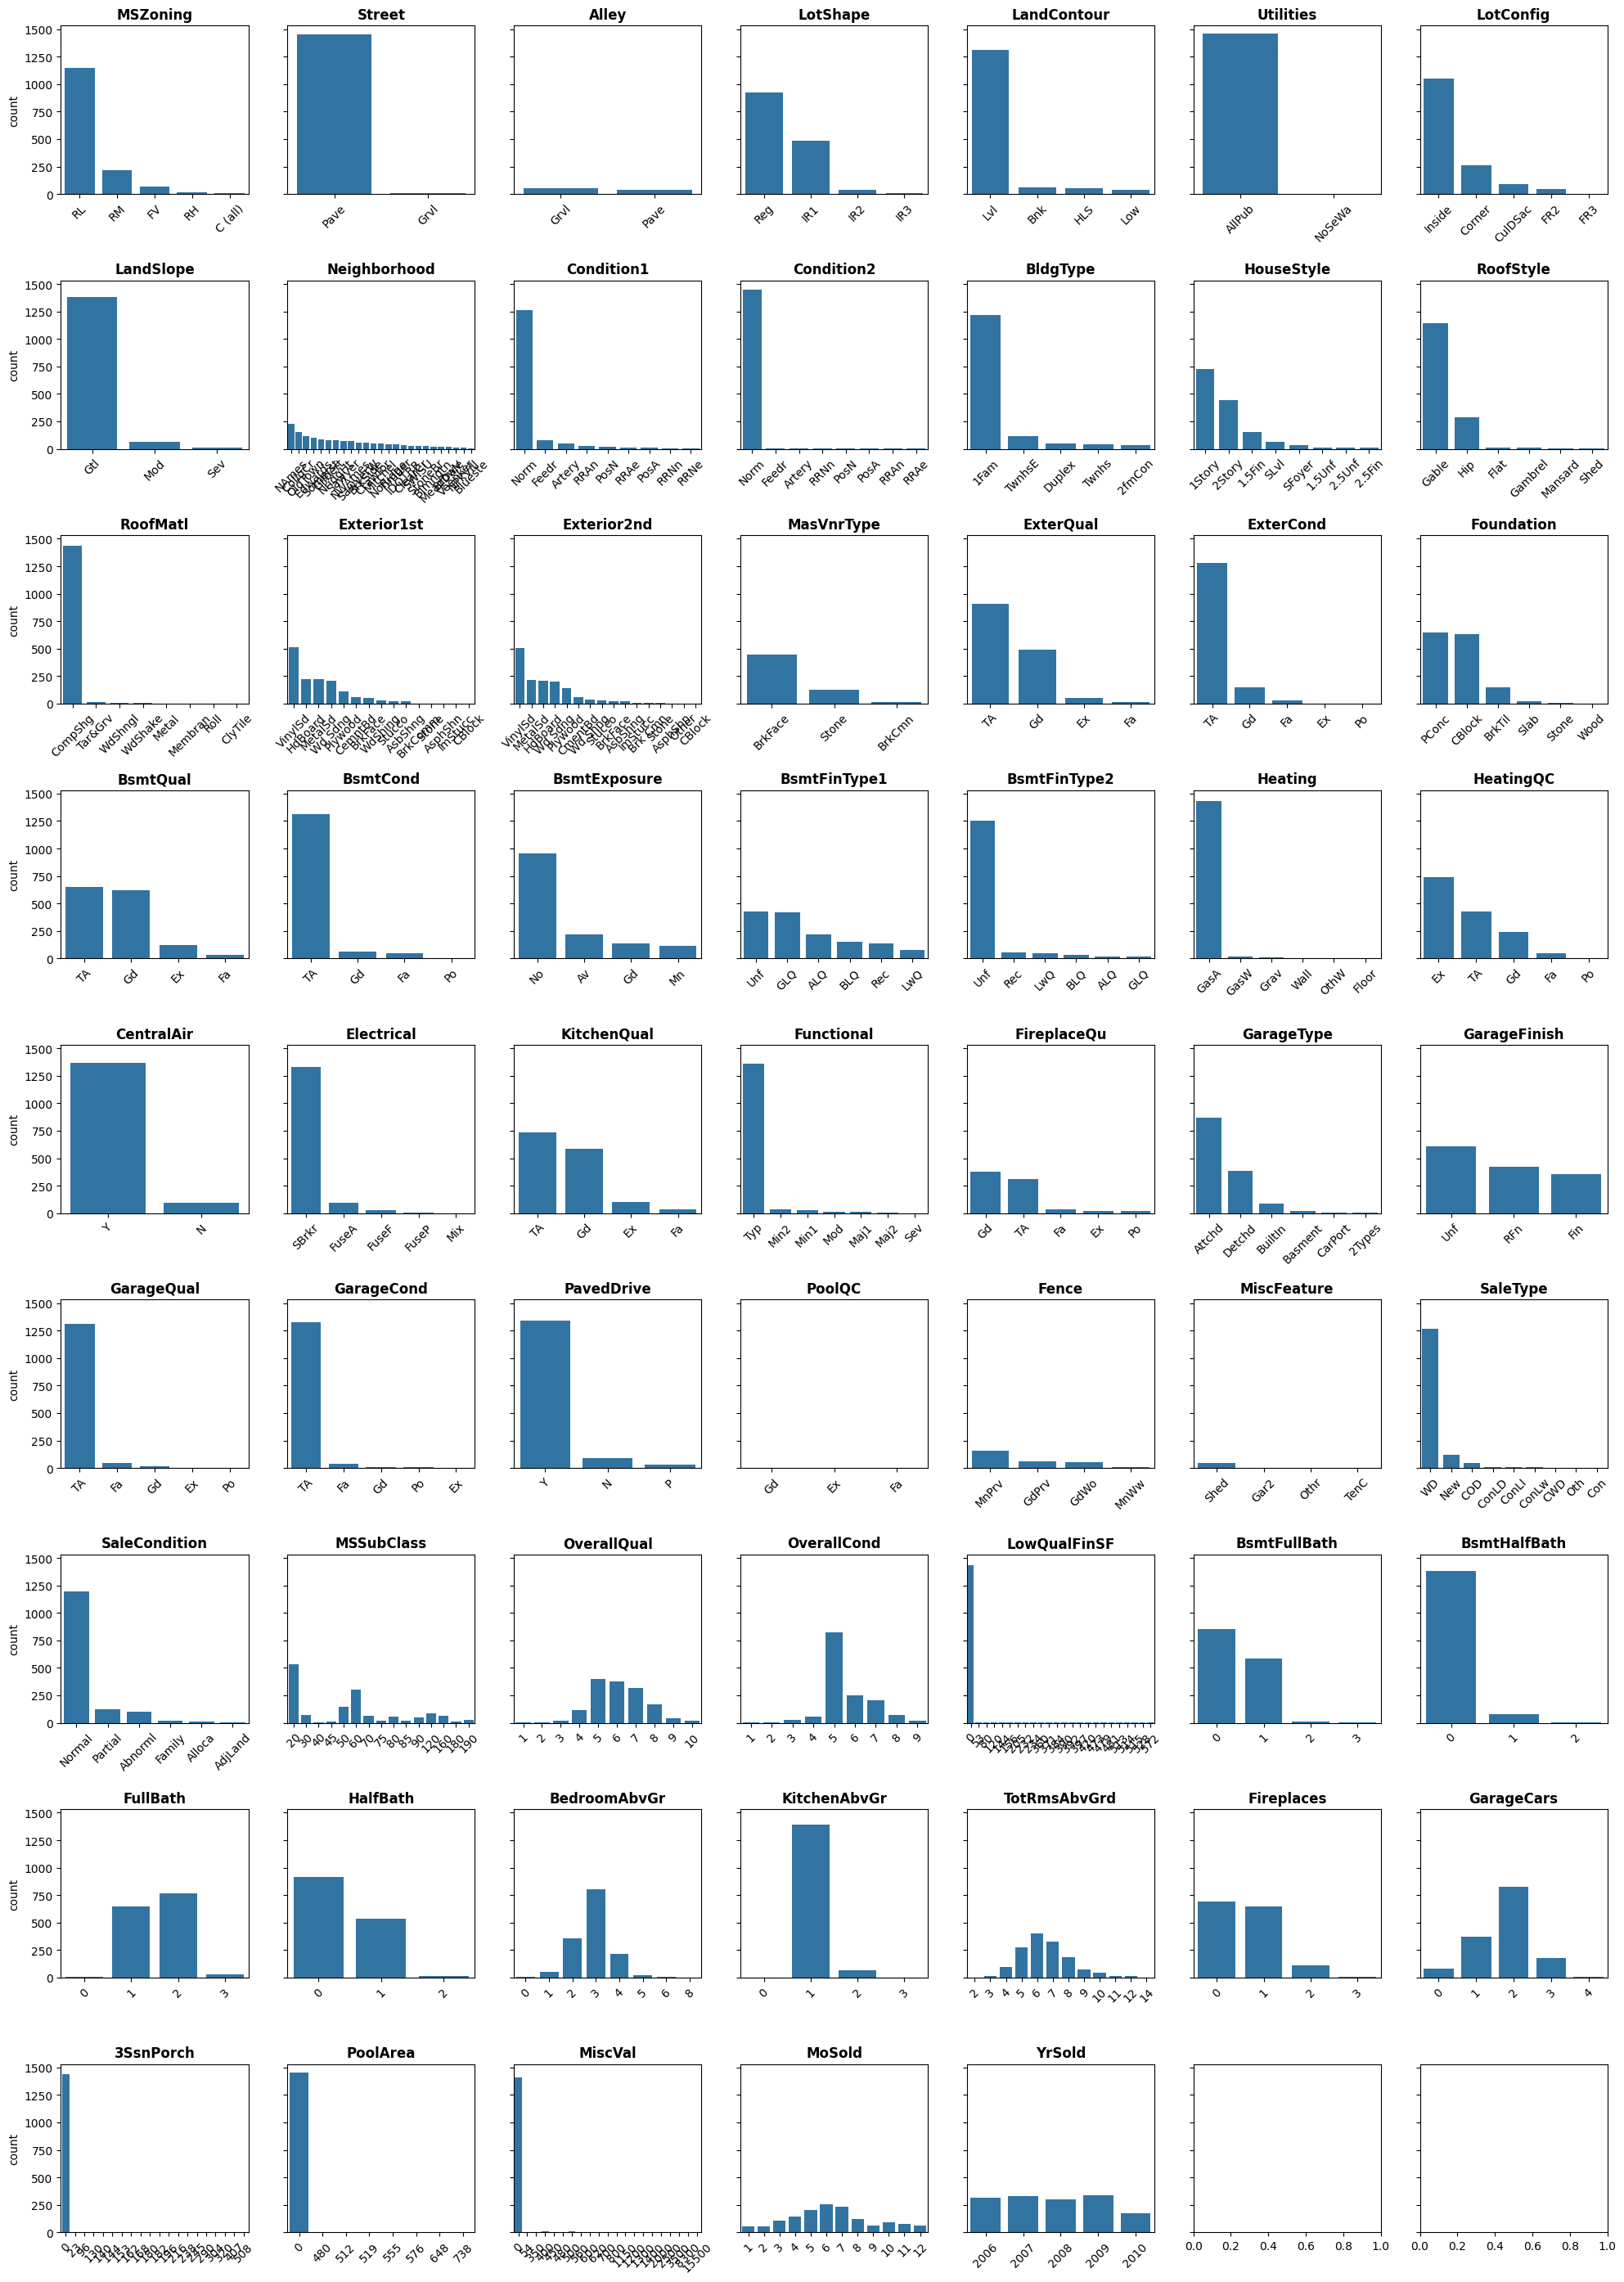

In [8]:
# Useless categorical features distribution
fig, axes = plt.subplots(9, 7, figsize=(20, 28), sharey=True)
axes = axes.ravel()

for i, var in enumerate(cat_cols):
    if df[var].dtypes == 'object':
        # sort by frequency
        sns.countplot(data=df, x=var, order=df[var].value_counts().index, ax=axes[i])
    else: 
        sns.countplot(data=df, x=var, ax=axes[i])
    axes[i].set_title(f'{var}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(None)
    axes[i].tick_params(axis='x', rotation=45)
    pass
plt.tight_layout()

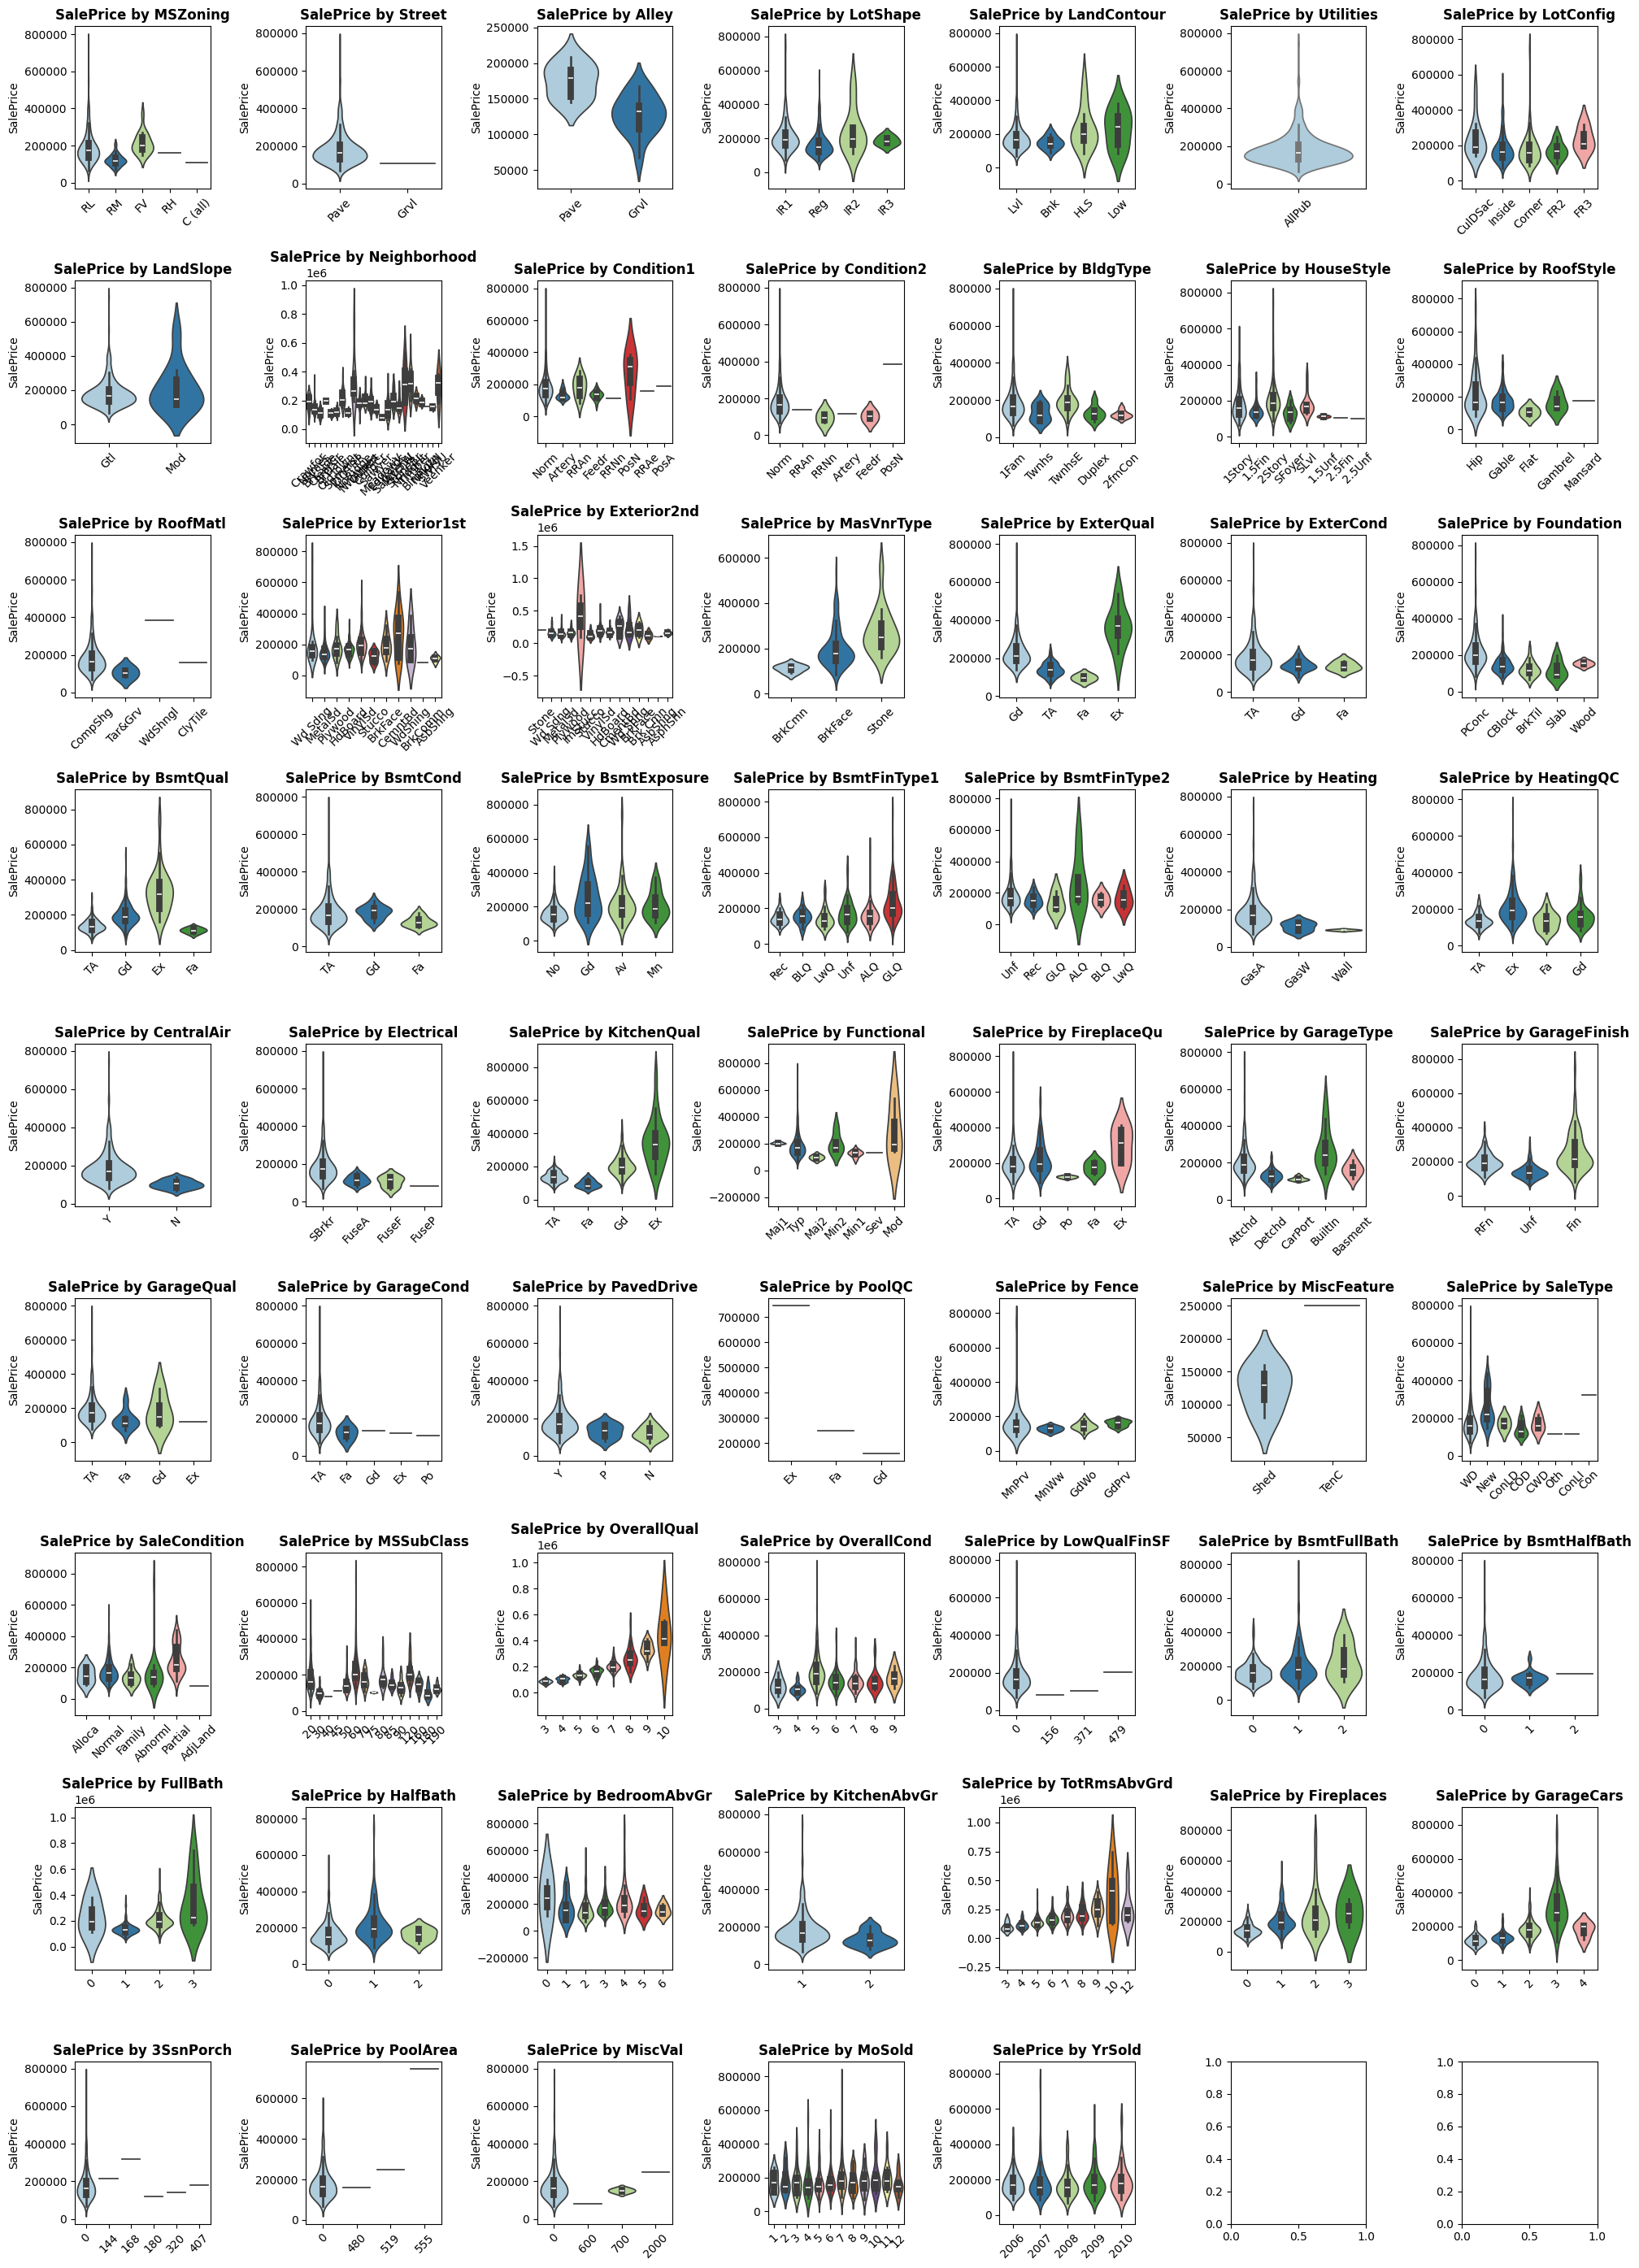

In [9]:
# General violinplot (30s)
fig, axes = plt.subplots(9, 7, figsize=(20, 28), sharey=False)
axes = axes.ravel()

for i, var in enumerate(cat_cols):
    sns.violinplot(data=df.sample(300, random_state=0), y='SalePrice', x=var, ax=axes[i], palette='Paired', hue=var, legend=False)
    axes[i].set_title(f'SalePrice by {var}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(None)
    axes[i].tick_params(axis='x', rotation=45)
    pass
plt.tight_layout()

**Insight**
- There are some categorical variables that have a high association with the target variable, `SalePrice`
- Some of them are BsmtQual, KitchenQual, OverallQual, OverallCond, TotRmsAbvGrd, and many more. 


LotArea         0.456461
OpenPorchSF     0.477561
Fireplaces      0.519247
TotRmsAbvGrd    0.532586
YearRemodAdd    0.571159
1stFlrSF        0.575408
GarageYrBlt     0.593788
TotalBsmtSF     0.602725
FullBath        0.635957
GarageArea      0.649379
YearBuilt       0.652682
GarageCars      0.690711
GrLivArea       0.731310
OverallQual     0.809829
SalePrice       1.000000
Name: SalePrice, dtype: float64


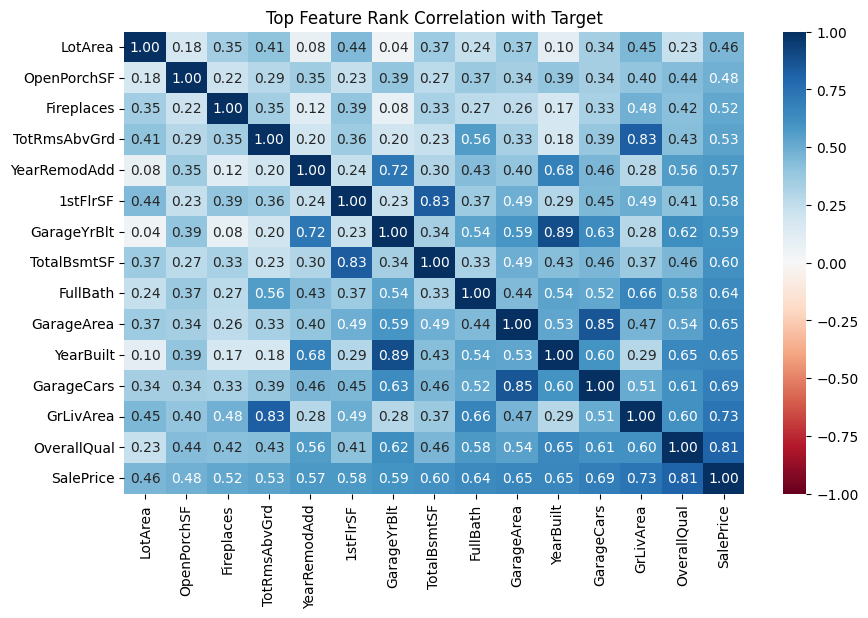

In [10]:
# Correlation matrix (numerical only)
corr = df[num_cols+[target]].corr(method='spearman')
top_index = abs(corr[target]).sort_values().sort_values().tail(15).index

print(corr[target][top_index])

plt.figure(figsize=(10, 6))
sns.heatmap(df[top_index].corr(method='spearman'), annot=True, cmap="RdBu", fmt=".2f", vmin=-1)
plt.title("Top Feature Rank Correlation with Target")
plt.savefig('../outputs/eda_rank_corr.png', bbox_inches='tight')
plt.show()

**Insight**
- Less than 15 of the numeric features (including ordinal), have absolute rank correlation more than 0.5 with `SalePrice`
- Some features are highly-correlated with each other
- More inspection: OverallQual, GrLivArea, Fireplaces

In [11]:
# Mutual information regression
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    # Impute NaN using median (for numeric, cuz for disc already factorize to -1) 
    X.fillna(X.median(), inplace=True)
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=2)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores, path=None):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    if path: 
        plt.savefig(path, bbox_inches='tight')

OverallQual     0.570843
Neighborhood    0.532090
GarageArea      0.497461
GrLivArea       0.432225
YearBuilt       0.409581
TotalBsmtSF     0.397428
LotArea         0.393363
GarageCars      0.356664
ExterQual       0.331919
KitchenQual     0.327171
BsmtQual        0.323148
GarageYrBlt     0.294548
1stFlrSF        0.281021
MSSubClass      0.277508
YearRemodAdd    0.274846
GarageFinish    0.263334
FullBath        0.262568
TotRmsAbvGrd    0.218091
GarageType      0.217679
FireplaceQu     0.215234
Name: MI Scores, dtype: float64


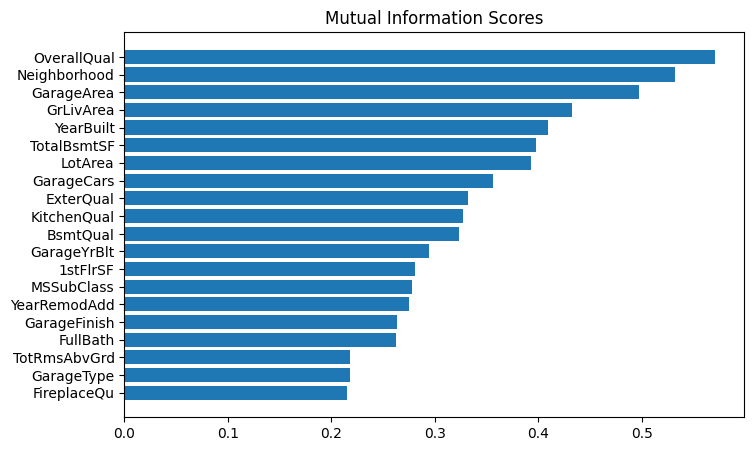

In [12]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

print(mi_scores.head(20))

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20), path='../outputs/eda_mi_scores.png')

**Insight**
- Mutual information could be seen as degree of association between features and target, higher is better. 
- The above barplot shows 20 features with the highest MI with the target
- More exploration:
    - Categorical/Ordinal: OverallQual, Neighborhood, MSSubClass, FullBath
    - Numerical: GarageArea, GrLivArea, YearBuilt, Fireplaces

In [ ]:
mi_scores.head(20).index

Index(['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt',
       'TotalBsmtSF', 'LotArea', 'GarageCars', 'ExterQual', 'KitchenQual',
       'BsmtQual', 'GarageYrBlt', '1stFlrSF', 'MSSubClass', 'YearRemodAdd',
       'GarageFinish', 'FullBath', 'TotRmsAbvGrd', 'GarageType',
       'FireplaceQu'],
      dtype='object')

### More Exploration
Some categorical and numerical features with high mutual information score or simply interesting. 


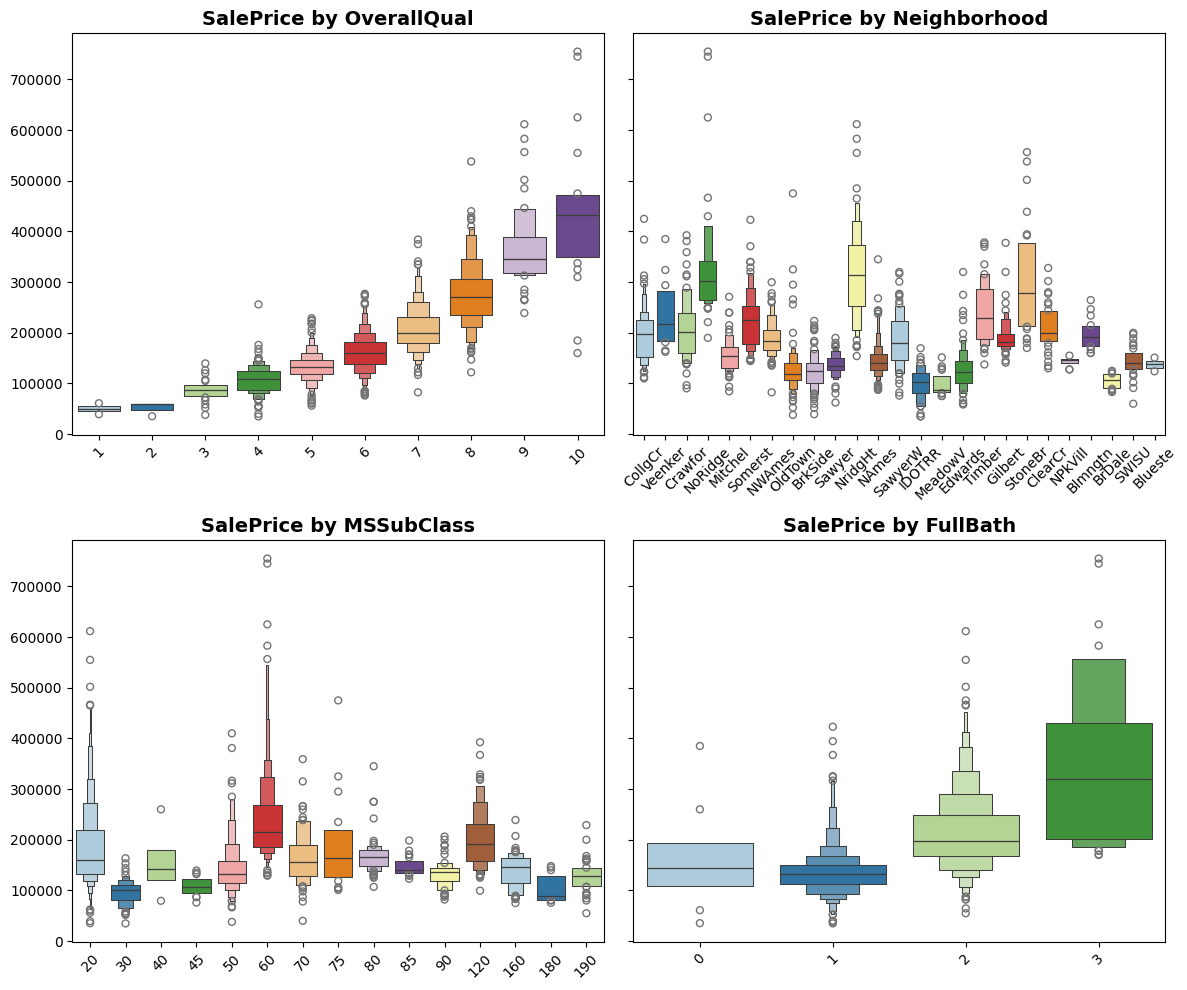

In [13]:
# Interesting categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axes = axes.ravel()

for i, var in enumerate(['OverallQual', 'Neighborhood', 'MSSubClass', 'FullBath']):
    sns.boxenplot(data=df, y='SalePrice', x=var, ax=axes[i], palette='Paired', hue=var, legend=False)
    axes[i].set_title(f'SalePrice by {var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)
    pass
plt.tight_layout()
plt.savefig('../outputs/eda_interesting_cat.png', bbox_inches='tight')


**Insight**
- Increasing OverallQual seems to increase the price.
- IDOTRR, Mitchel, and StoneBr neighborhood seems to have higher median price, while Sawyer is the least.
- 60 & 120 MSSubClass seems to have higher median price, while 30 & 180 are the least.
- Except for 0 FullBath, higher FullBath seems to have higher median price.    

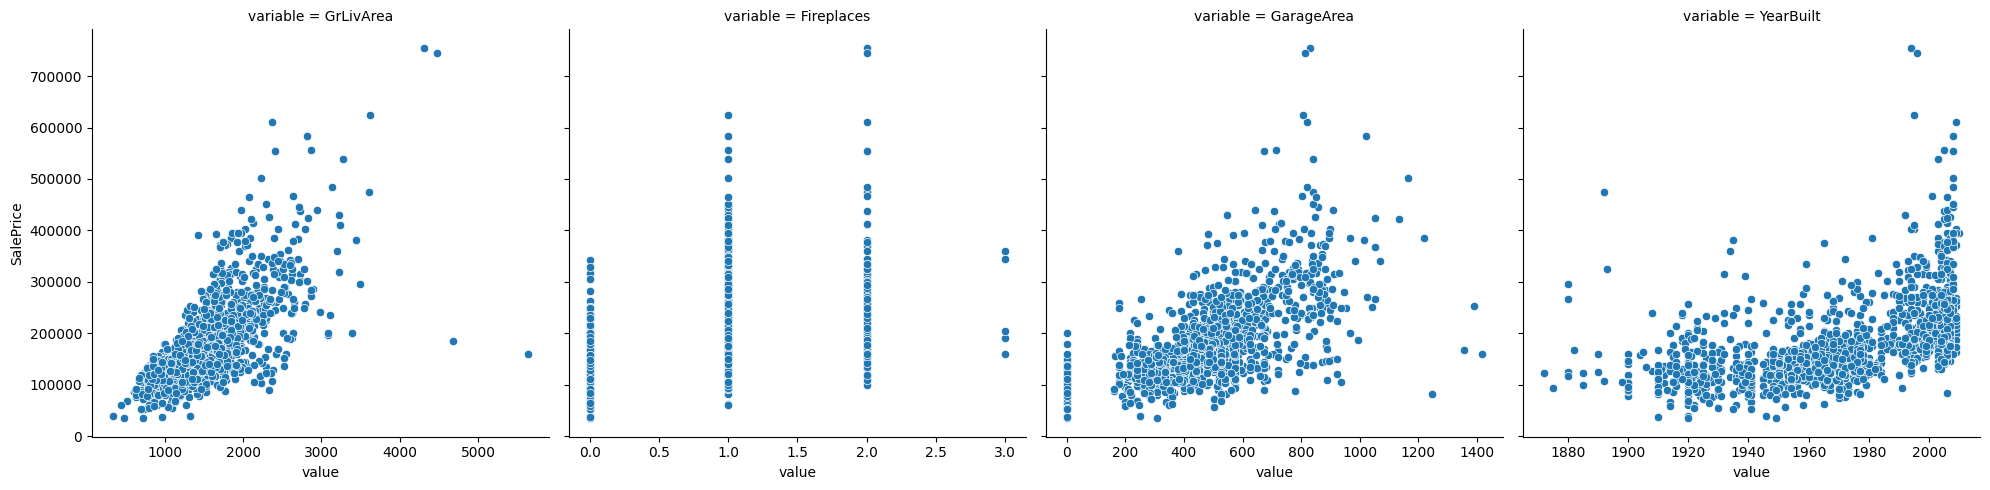

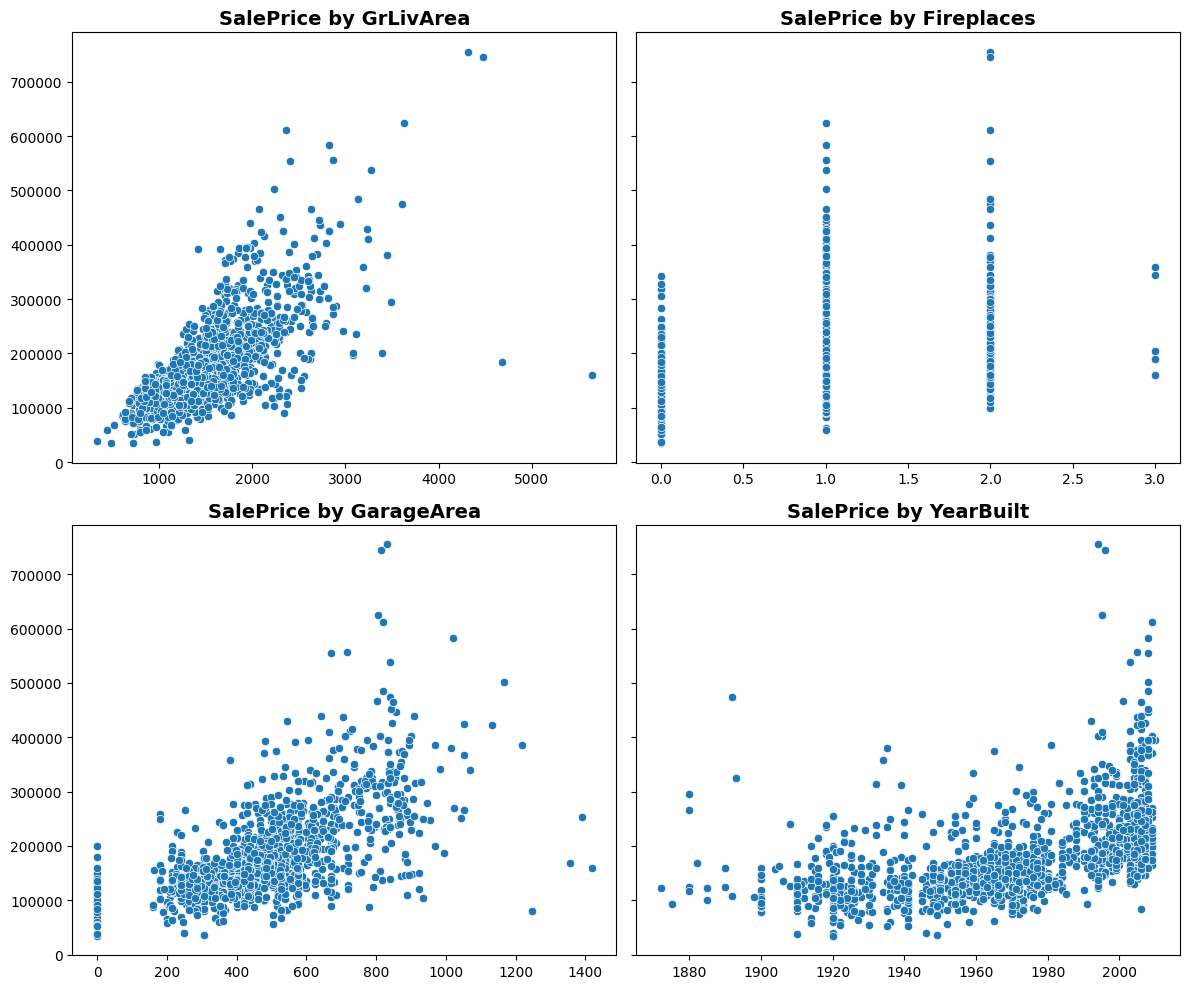

In [14]:
# Interesting numerical features
in_num_cols = ['GrLivArea', 'Fireplaces', 'GarageArea', 'YearBuilt']

sns.relplot(
    x="value", y="SalePrice", col="variable", 
    data=df.melt(id_vars="SalePrice", value_vars=in_num_cols), 
    facet_kws=dict(sharex=False)
    )

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axes = axes.ravel()
for i, var in enumerate(in_num_cols):
    sns.scatterplot(data=df, y='SalePrice', x=var, ax=axes[i])
    axes[i].set_title(f'SalePrice by {var}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
plt.tight_layout()
plt.savefig('../outputs/eda_interesting_num.png', bbox_inches='tight')


**Insight**
- Although there is a high variability, there is a positive monotonic relationship between the target and these 3 features: GrLivArea, GarageArea, and YearBuilt. 
- There might be an association between Fireplaces and the target, although very low. 